### Import Libraries

In [ ]:
import yfinance as yf
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Data Loading and Exploration

In [ ]:
# Load Netflix historical stock data
data = pd.read_csv('/content/data/NFLX.csv')

**Data Analyses:**
We are going to analyze the structure, content, and trends of the Netflix stock data from by displaying its information, checking for missing values, generating descriptive statistics, and visualizing the 'Close' price over time, then summarize insights for machine learning modeling.

In [ ]:
print(data.head())   # Print the first 5 rows of the DataFrame

print("\nInformation about the DataFrame:")
data.info()          # Print the data coloumns information such as data type

print("\nShape of the DataFrame (rows, columns):")
print(data.shape)    # Print the data size

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   f

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Calculate and display descriptive statistics for the numerical columns in the data DataFrame
print("Descriptive statistics for the DataFrame:")
print(data.describe())

Descriptive statistics for the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


Visualize 'Close' price over time but before doing that and in order to prepare the data for time-series plotting, We will convert the 'Date' column to datetime objects and then set it as the DataFrame's index. A 20 day and 50 day moving average plots were also calculated and plotted.



In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print("Date column converted to datetime and set as index.")

Date column converted to datetime and set as index.


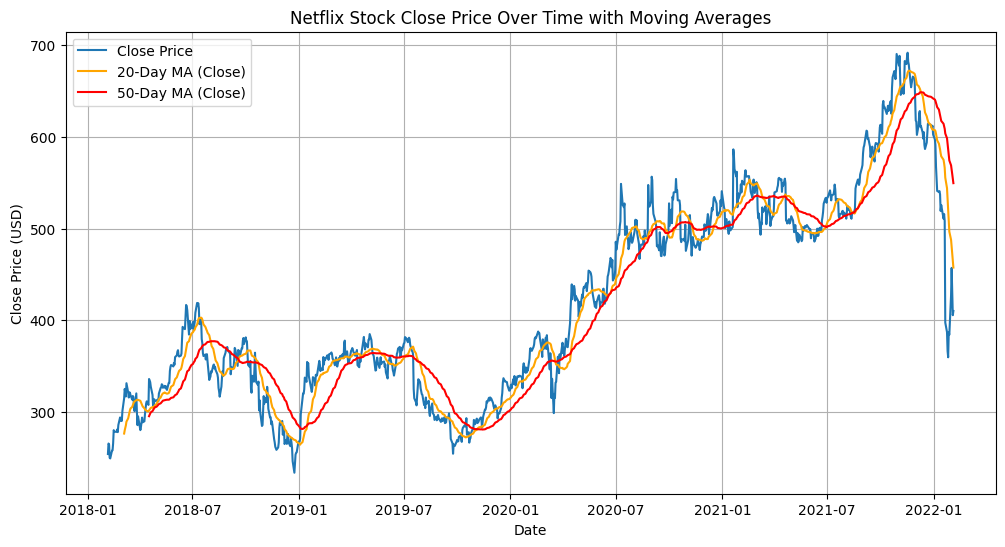

In [ ]:
# Create a line plot of the 'Close' price over , 20 day MA, & 50 day MA.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Close'].rolling(window=20).mean(), label='20-Day MA (Close)', color='orange')
plt.plot(data.index, data['Close'].rolling(window=50).mean(), label='50-Day MA (Close)', color='red')
plt.title('Netflix Stock Close Price Over Time with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

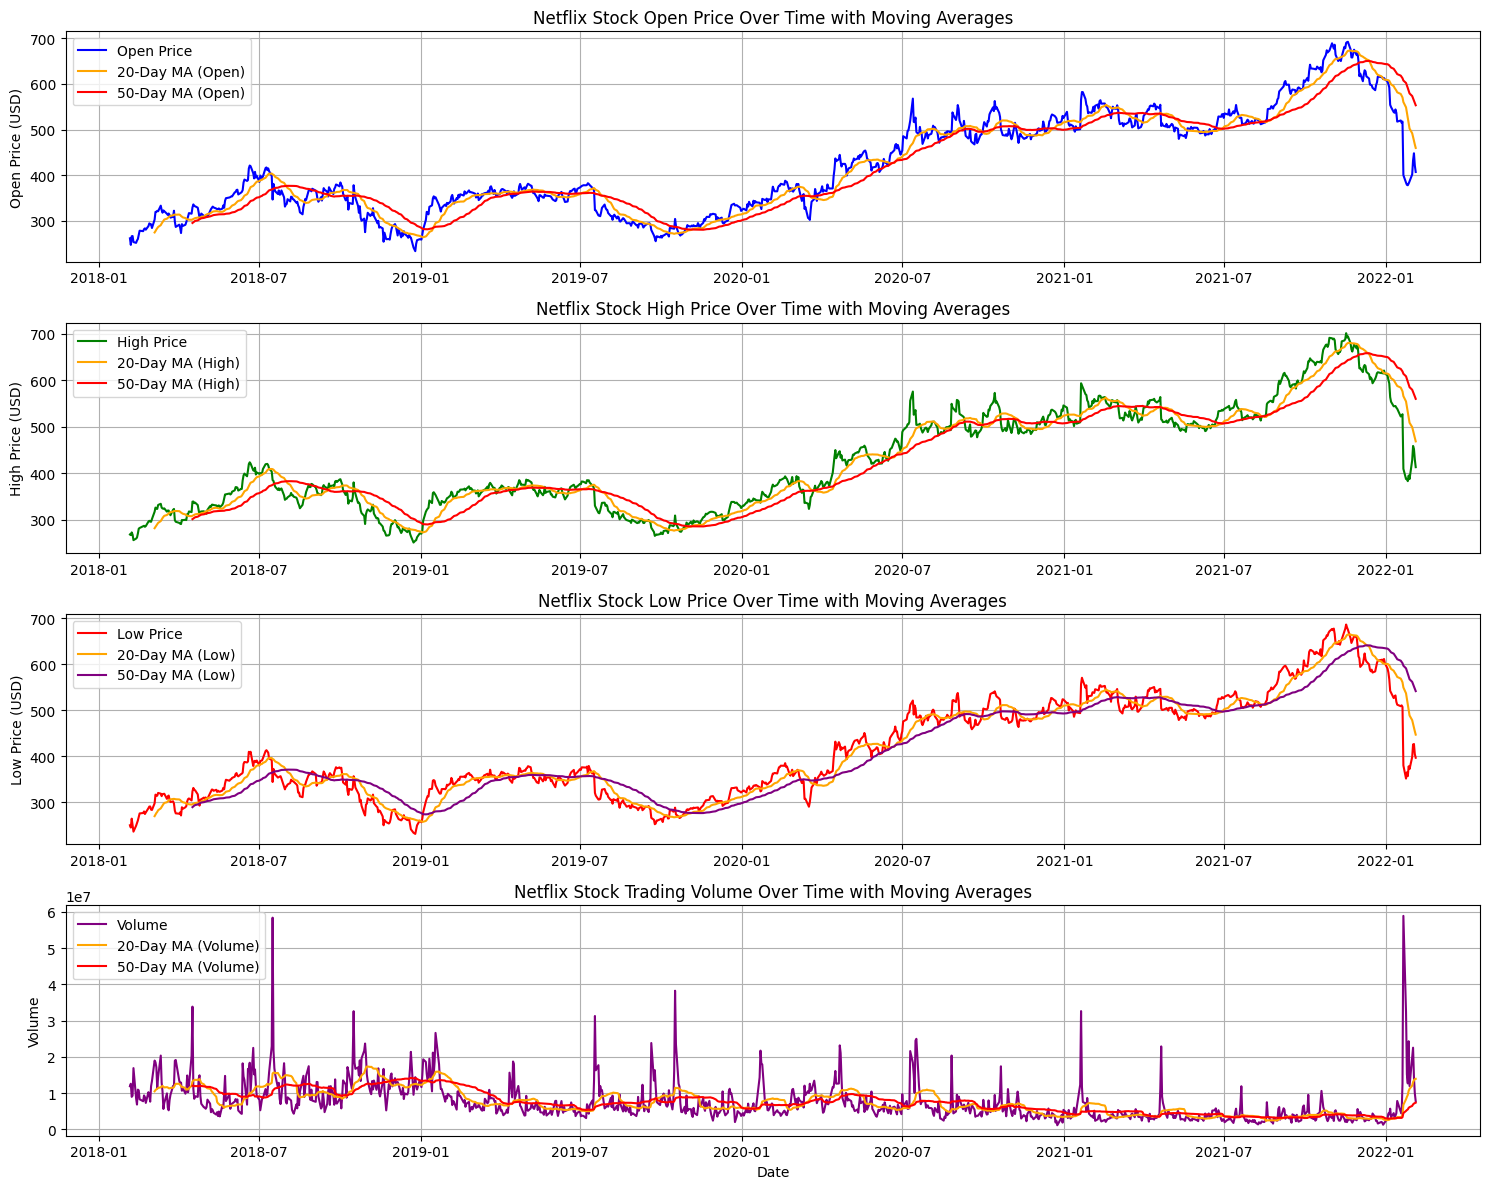

In [ ]:
# Plot all other numerical comuns over time and include 20 day & 50 day moving average plots

plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(data.index, data['Open'], label='Open Price', color='blue')
plt.plot(data.index, data['Open'].rolling(window=20).mean(), label='20-Day MA (Open)', color='orange')
plt.plot(data.index, data['Open'].rolling(window=50).mean(), label='50-Day MA (Open)', color='red')
plt.title('Netflix Stock Open Price Over Time with Moving Averages')
plt.ylabel('Open Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(data.index, data['High'], label='High Price', color='green')
plt.plot(data.index, data['High'].rolling(window=20).mean(), label='20-Day MA (High)', color='orange')
plt.plot(data.index, data['High'].rolling(window=50).mean(), label='50-Day MA (High)', color='red')
plt.title('Netflix Stock High Price Over Time with Moving Averages')
plt.ylabel('High Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(data.index, data['Low'], label='Low Price', color='red')
plt.plot(data.index, data['Low'].rolling(window=20).mean(), label='20-Day MA (Low)', color='orange')
plt.plot(data.index, data['Low'].rolling(window=50).mean(), label='50-Day MA (Low)', color='purple')
plt.title('Netflix Stock Low Price Over Time with Moving Averages')
plt.ylabel('Low Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(data.index, data['Volume'], label='Volume', color='purple')
plt.plot(data.index, data['Volume'].rolling(window=20).mean(), label='20-Day MA (Volume)', color='orange')
plt.plot(data.index, data['Volume'].rolling(window=50).mean(), label='50-Day MA (Volume)', color='red')
plt.title('Netflix Stock Trading Volume Over Time with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

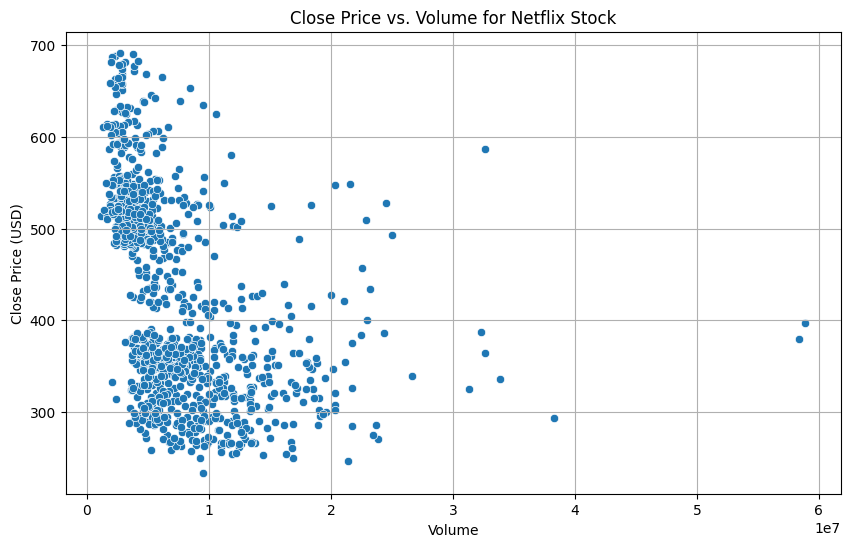

In [ ]:
# Plot 'Close' price versus volume to check is there is any relation between them that may help in creating the ML model
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=data)
plt.title('Close Price vs. Volume for Netflix Stock')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

### Data Analysis Key Findings

*   The dataset contains 1009 entries and 7 columns, including `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`.
*   There are no missing values across any of the columns in the dataset, indicating a complete data record.
*   Numerical columns (`Open`, `High`, `Low`, `Close`, `Adj Close`) show significant price fluctuation, with minimum values ranging from approximately \$231 to \$250 and maximums from \$686 to \$700. The mean prices are around \$412-\$425, with a standard deviation of about \$107-\$109, highlighting high volatility.
*   The 'Close' and 'Adj Close' price columns have identical descriptive statistics, suggesting they contain the same information in this dataset.
*   The `Volume` column shows high variability, ranging from a minimum of 1.14 million to a maximum of 58.9 million shares, with an average daily volume of approximately 7.57 million shares and a standard deviation of about 5.47 million.
*   A time-series plot of the 'Close' price visually confirmed the fluctuating trend of Netflix stock over the observed period.

### Insights or Next Steps

*   The dataset's completeness and the `Date` column's proper conversion to datetime make it well-prepared for time-series machine learning models without requiring extensive data cleaning for missing values.
*   The high volatility in stock prices and trading volume suggests that machine learning models for forecasting should be robust to significant fluctuations and potentially incorporate volatility metrics as features. Given that 'Close' and 'Adj Close' are identical, one can be dropped to simplify the model and avoid multicollinearity without losing information.


### Now we are going to calculate the pairwise correlation matrix for all numerical columns in the 'data' DataFrame.


In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)

Correlation Matrix for Numerical Columns:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998605  0.998508  0.996812   0.996812 -0.415838
High       0.998605  1.000000  0.998203  0.998551   0.998551 -0.400699
Low        0.998508  0.998203  1.000000  0.998544   0.998544 -0.432116
Close      0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362
Adj Close  0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362
Volume    -0.415838 -0.400699 -0.432116 -0.413362  -0.413362  1.000000


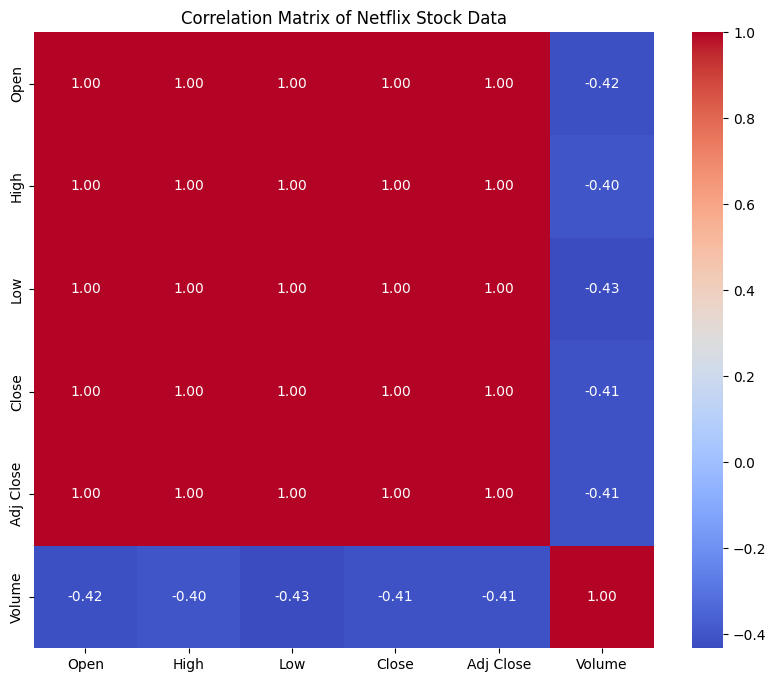

In [ ]:
# Will use the heatmap to plot the correlation matrix values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Netflix Stock Data')
plt.show()

### Summary of Correlation Analysis

*   **High Positive Correlation among Price Metrics**: The `Open`, `High`, `Low`, `Close`, and `Adj Close` prices show extremely high positive correlations with each other (all above 0.99). This indicates that these price series move almost in perfect lockstep, which is expected for different price points within the same trading day or adjusted prices.
    *   **Implication for ML Modeling**: This strong multicollinearity suggests that including all these features directly into a linear model could lead to issues like unstable coefficient estimates, reduced model interpretability, and potentially overfitting. For most models, one or two of these (e.g., `Close` and potentially `Open` or `High-Low` spread) would suffice, or they could be combined into synthetic features. Given that `Close` and `Adj Close` are identical, one should definitely be dropped.

*   **Negative Correlation with Volume**: The `Volume` column shows a moderate negative correlation with all price metrics (ranging from -0.40 to -0.43). This implies that as the stock price generally increased over this period, the trading volume tended to decrease. Conversely, periods of lower prices might correspond to higher trading volumes.
    *   **Implication for ML Modeling**: This negative correlation is a valuable insight. `Volume` can be an important feature for predicting price movements, as high volume often accompanies significant price changes (up or down). However, its relationship with price isn't straightforwardly positive or negative and might suggest more complex interactions or lagging effects. Feature engineering around `Volume` (e.g., volume change, moving average of volume, or volume spikes) could be beneficial.

*   **Feature Selection Considerations**:
    *   Due to the very high correlation between `Open`, `High`, `Low`, `Close`, and `Adj Close`, it is beneficial to select a subset of these features or create new features that capture the daily price range (`High - Low`) and daily change (`Close - Open`). Dropping `Adj Close` is a clear step as it is perfectly correlated with `Close`.
    *   `Volume` is an independent and potentially informative feature despite its moderate negative correlation with prices. It should be considered for inclusion, possibly after some transformation or combination with other features, as it can reflect market sentiment and liquidity.
*   **Advanced Time Series Modeling:** The observed trends and significant volatility suggest that traditional regression models might not fully capture the underlying dynamics. Advanced time series models like ARIMA/GARCH for volatility modeling, or deep learning approaches such as LSTMs, which are well-suited for sequential data and capturing complex temporal dependencies, should be considered for future price prediction.

In [ ]:
# Drop the 'Adj Close' column from the data DataFrame, as it is perfectly correlated with the 'Close' column and can introduce multicollinearity in machine learning models.
data.drop('Adj Close', axis=1, inplace=True)
print("DataFrame after dropping 'Adj Close' column:")
print(data.head())

DataFrame after dropping 'Adj Close' column:
                  Open        High         Low       Close    Volume
Date                                                                
2018-02-05  262.000000  267.899994  250.029999  254.259995  11896100
2018-02-06  247.699997  266.700012  245.000000  265.720001  12595800
2018-02-07  266.579987  272.450012  264.329987  264.559998   8981500
2018-02-08  267.079987  267.619995  250.000000  250.100006   9306700
2018-02-09  253.850006  255.800003  236.110001  249.470001  16906900


### Reindex and Forward-Fill Missing 'Close' Prices
Reindex the `data` DataFrame to a complete daily date range and then apply forward-fill (`ffill()`) to the 'Close' price column to propagate the last observed closing price to missing days, effectively filling in non-trading days with the previous day's value.


In [ ]:
min_date = data.index.min()
max_date = data.index.max()

full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

data = data.reindex(full_date_range)

data['Close'] = data['Close'].ffill()
data['Open'] = data['Open'].ffill()
data['Open'] = data['Open'].ffill()
data['High'] = data['High'].ffill()
data['Low'] = data['Low'].ffill()
data['Volume'] = data['Volume'].ffill()
print("DataFrame reindexed to a complete daily date range and all columns are forward-filled.")
print("First 5 rows of the reindexed and filled DataFrame:")
print(data.head())

DataFrame reindexed to a complete daily date range and all columns are forward-filled.
First 5 rows of the reindexed and filled DataFrame:
                  Open        High         Low       Close      Volume
2018-02-05  262.000000  267.899994  250.029999  254.259995  11896100.0
2018-02-06  247.699997  266.700012  245.000000  265.720001  12595800.0
2018-02-07  266.579987  272.450012  264.329987  264.559998   8981500.0
2018-02-08  267.079987  267.619995  250.000000  250.100006   9306700.0
2018-02-09  253.850006  255.800003  236.110001  249.470001  16906900.0


In [ ]:
# Check missing values after reindexing and forward-fill to fully verify the successful imputation
print(data.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
# Checked the imputed data frame size
print(data.shape)

(1461, 5)


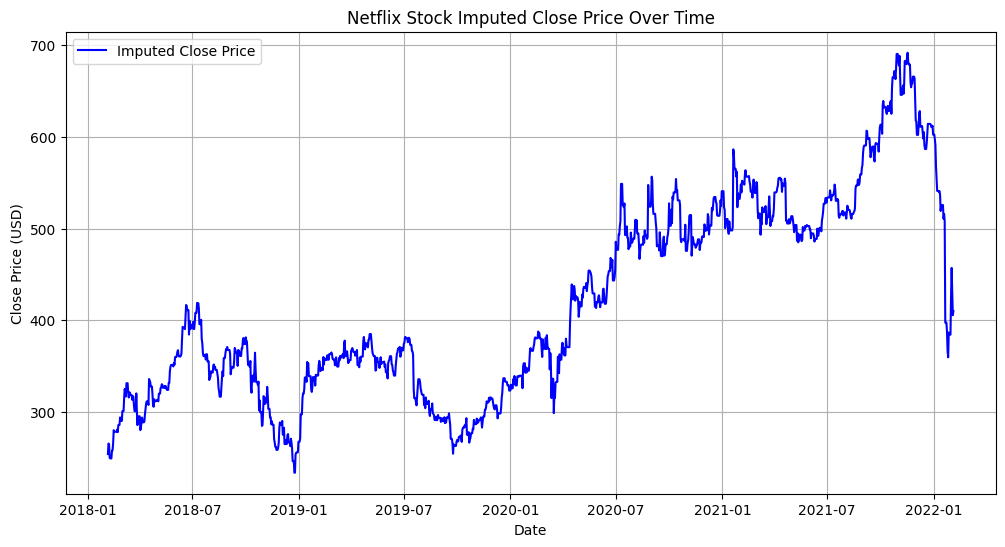

In [ ]:
# Plot the imputed 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Imputed Close Price', color='blue')
plt.title('Netflix Stock Imputed Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the first 10 rows to make sure that all days of the week are poulated with valid data
data.head(10)

,Open,High,Low,Close,Volume
2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900.0
2018-02-10,253.850006,255.800003,236.110001,249.470001,16906900.0
2018-02-11,253.850006,255.800003,236.110001,249.470001,16906900.0
2018-02-12,252.139999,259.149994,249.000000,257.950012,8534900.0
2018-02-13,257.290009,261.410004,254.699997,258.269989,6855200.0
2018-02-14,260.470001,269.880005,260.329987,266.000000,10972000.0


### Lets split the input features 'Open' & 'Volume' and target vriable "Close' price data and make it ready for ML modelling,

In [ ]:
# Split the scaled data into 90% training and 10% test for the closing price
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Close', 'High', 'Low'])
y = data['Close']

# Split data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, stratify=None)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1314, 2)
Shape of X_test: (147, 2)
Shape of y_train: (1314,)
Shape of y_test: (147,)


### Lets create a scaled version of the split input features 'Open' & 'Volume' and target vriable "Close' price data and make it ready for ML modelling

In [ ]:
# Generated a scaled training and testing dataset
from sklearn.preprocessing import StandardScaler
import pandas as pd
data_scaled = data
# Identify numerical columns for scaling (excluding the 'Date' index)
# 'Close_diff' is not in the current DataFrame, so it is removed from the list.
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Instantiate StandardScaler
scaler = StandardScaler()

# Create a copy of the numerical data to avoid SettingWithCopyWarning
data_to_scale = data_scaled[numerical_cols].copy()

# Fit and transform the numerical columns
data_scaled[numerical_cols] = scaler.fit_transform(data_to_scale)

print("Data successfully scaled using StandardScaler.")
print("First 5 rows of the scaled DataFrame:")
print(data_scaled.head())

# Define features (X) and target (y)
X_scaled = data_scaled.drop(columns=['Close', 'High', 'Low'])
y_scaled = data_scaled['Close']

# Split data into training and testing sets (90% train, 10% test)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=0.1, shuffle=False, stratify=None)

print(f"Shape of X_scaled_train: {X_scaled_train.shape}")
print(f"Shape of X_scaled_test: {X_scaled_test.shape}")
print(f"Shape of y_scaled_train: {y_scaled_train.shape}")
print(f"Shape of y_scaled_test: {y_scaled_test.shape}")

Data successfully scaled using StandardScaler.
First 5 rows of the scaled DataFrame:
                Open      High       Low     Close    Volume
2018-02-05 -1.446353 -1.436692 -1.507527 -1.515836  0.778202
2018-02-06 -1.578154 -1.447671 -1.554294 -1.410129  0.903020
2018-02-07 -1.404139 -1.395058 -1.374570 -1.420829  0.258273
2018-02-08 -1.399531 -1.439254 -1.507806 -1.554207  0.316285
2018-02-09 -1.521470 -1.547408 -1.636951 -1.560019  1.672068
Shape of X_scaled_train: (1314, 2)
Shape of X_scaled_test: (147, 2)
Shape of y_scaled_train: (1314,)
Shape of y_scaled_test: (147,)


### Model Training and Evaluation

For this task we are going to use two distinct input features that may help coming up with a reasonable model, these are 'Open" price and 'Volume'. The target variable is going to be the closing price. At this stage of the project, the prediction is going to happen on a daily basis since we don't have other distinct input features such company sentiments, or RSI,..etc. Three models are going to be explored, these are:
*   Decision Tree, with hyperparameter optimization
*   SVR (Support Vector Regression), with hyper parameters optimization
*   ARIMAX


### Train Decision Tree Regressor model using the preprocessed training data (X_train, y_train).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
# X_train = X_scaled_train
# y_train = y_scaled_train

# Train the model using the unscaled training data
dt_model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

Decision Tree Regressor model trained successfully.


## Make Predictions with Decision Tree

In [ ]:
# Make predictions on the test data
# X_test = X_scaled_test
# y_test = y_scaled_test

dt_predictions = dt_model.predict(X_test)

print("Predictions made successfully on the test set.")
print("First 5 predictions:")
print(dt_predictions[:5])

Predictions made successfully on the test set.
First 5 predictions:
[598.719971 598.719971 598.719971 590.530029 582.070007]


## Evaluate Decision Tree Model Performance
Evaluate the performance of the Decision Tree Regressor model using appropriate metrics (e.g., Mean Squared Error, R-squared) and visualize the predictions against actual values.

Mean Squared Error (MSE): 1637.5792
R-squared (R2): 0.7382


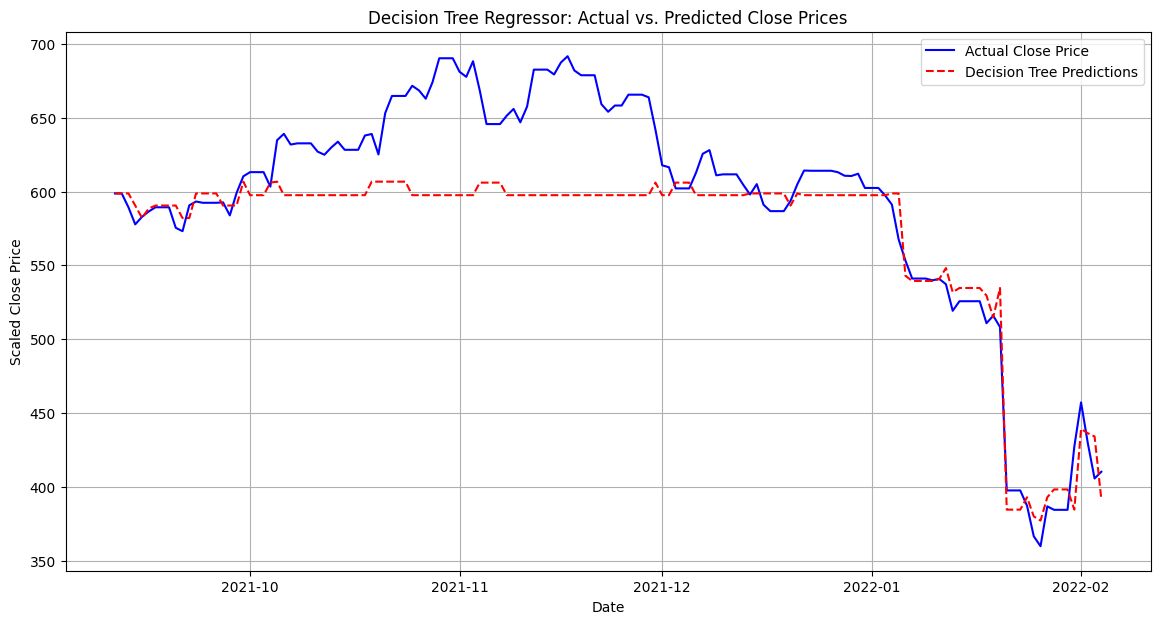

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics
mse = mean_squared_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, dt_predictions, label='Decision Tree Predictions', color='red', linestyle='--')
plt.title('Decision Tree Regressor: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

Predictions made successfully on the training set.


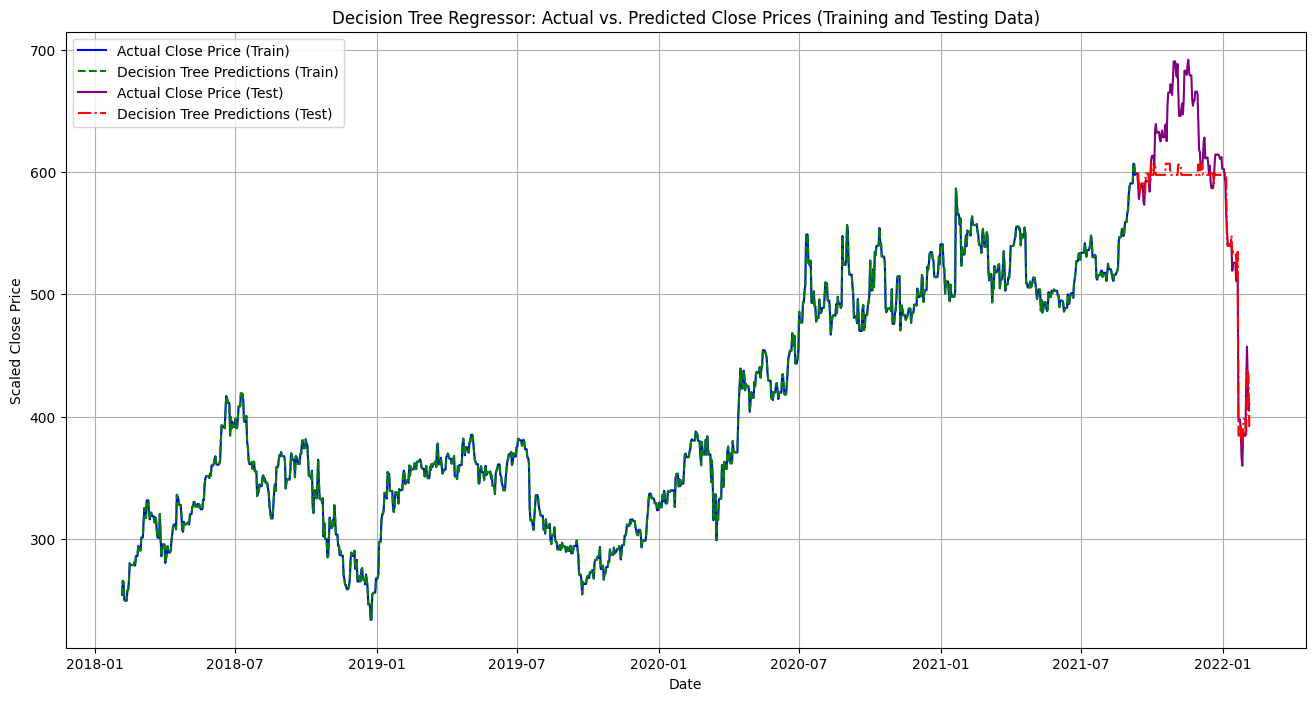

In [ ]:
# Make predictions on the training set
dt_train_predictions = dt_model.predict(X_train)

print("Predictions made successfully on the training set.")

# Visualize predictions vs. actual values for training and testing data
plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train, label='Actual Close Price (Train)', color='blue')
plt.plot(y_train.index, dt_train_predictions, label='Decision Tree Predictions (Train)', color='green', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Close Price (Test)', color='purple')
plt.plot(y_test.index, dt_predictions, label='Decision Tree Predictions (Test)', color='red', linestyle='-.')
plt.title('Decision Tree Regressor: Actual vs. Predicted Close Prices (Training and Testing Data)')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Hyperparameter Optimization
Optimize the Decision Tree Regressor model by defining a hyperparameter search space for 'max_depth', 'min_samples_split', and 'min_samples_leaf', then run 'GridSearchCV' on the scaled training data. Evaluate the best Decision Tree model by training it with the identified optimal hyperparameters, predicting on the test set, and calculating its MSE and R-squared.

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Defined hyperparameter grid for Decision Tree Regressor:")
print(param_grid)

Defined hyperparameter grid for Decision Tree Regressor:
{'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Now that the hyperparameter search space for the Decision Tree Regressor is defined, we are going to perform GridSearchCV on the training data to find the best hyperparameters.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid,
                           cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

print("GridSearchCV for Decision Tree completed successfully.")
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best R-squared score found: ", grid_search_dt.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
GridSearchCV for Decision Tree completed successfully.
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R-squared score found:  0.8741071397706085


In [ ]:
# Retrieve the best hyperparameters from the GridSearchCV result, initialize a new Decision Tree Regressor model with these parameters,
# and then train this optimized model on the training data (X_train, y_train). will then make predictions on the test features (X_test).
from sklearn.tree import DecisionTreeRegressor

# Retrieve the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree model:", best_params_dt)

# Initialize a new Decision Tree Regressor model with the best parameters
optimized_dt_model = DecisionTreeRegressor(random_state=42, **best_params_dt)

# Train the optimized Decision Tree model using the training data
optimized_dt_model.fit(X_train, y_train)

print("Optimized Decision Tree model trained successfully.")

# Make predictions on the test features
optimized_dt_predictions = optimized_dt_model.predict(X_test)

print("Predictions made successfully on the test set using optimized Decision Tree model.")
print("First 5 optimized Decision Tree predictions:")
print(optimized_dt_predictions[:5])

Best parameters for Decision Tree model: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimized Decision Tree model trained successfully.
Predictions made successfully on the test set using optimized Decision Tree model.
First 5 optimized Decision Tree predictions:
[595.52111811 595.52111811 595.52111811 595.52111811 571.4839966 ]


**Decision Tree Evaluation**:
To evaluate the performance of the optimized Decision Tree model, we will calculate the Mean Squared Error (MSE) and R-squared (R2) score between the actual test values ('y_test') and the optimized Decision Tree predictions ('optimized_dt_predictions'). Then, We will visualize these predictions against the actual values to provide a clear understanding of the model's performance.



Optimized Decision Tree Model - Mean Squared Error (MSE): 1791.3360
Optimized Decision Tree Model - R-squared (R2): 0.7136


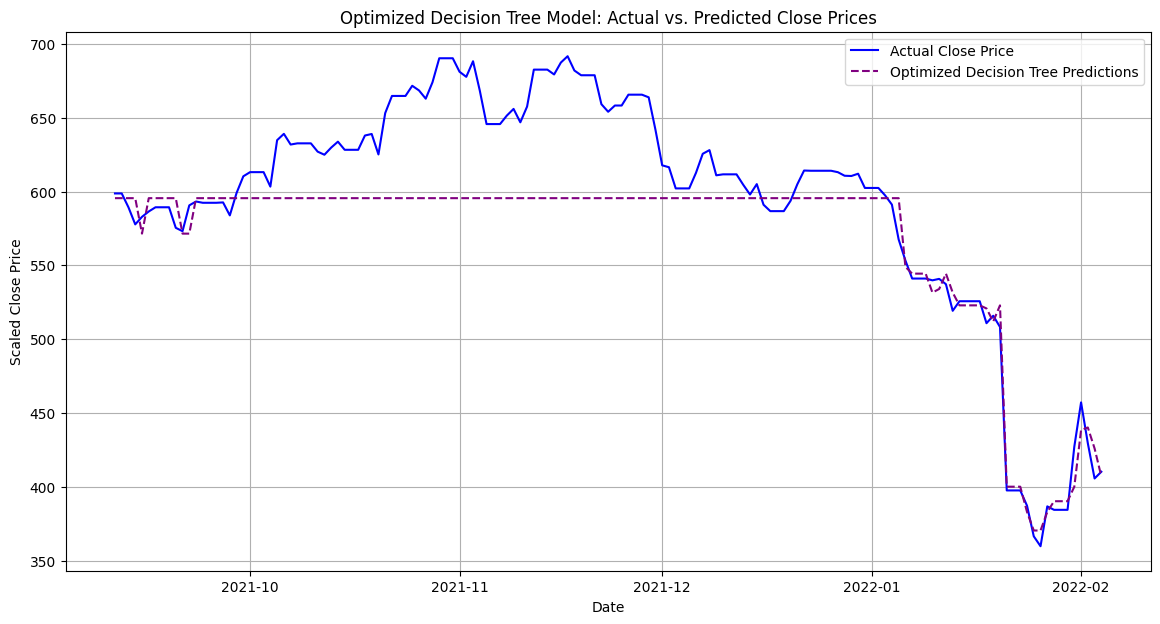

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics for optimized Decision Tree model
mse_optimized_dt = mean_squared_error(y_test, optimized_dt_predictions)
r2_optimized_dt = r2_score(y_test, optimized_dt_predictions)

print(f"Optimized Decision Tree Model - Mean Squared Error (MSE): {mse_optimized_dt:.4f}")
print(f"Optimized Decision Tree Model - R-squared (R2): {r2_optimized_dt:.4f}")

# Visualize optimized Decision Tree predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, optimized_dt_predictions, label='Optimized Decision Tree Predictions', color='purple', linestyle='--')
plt.title('Optimized Decision Tree Model: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

Predictions made successfully on the training set.


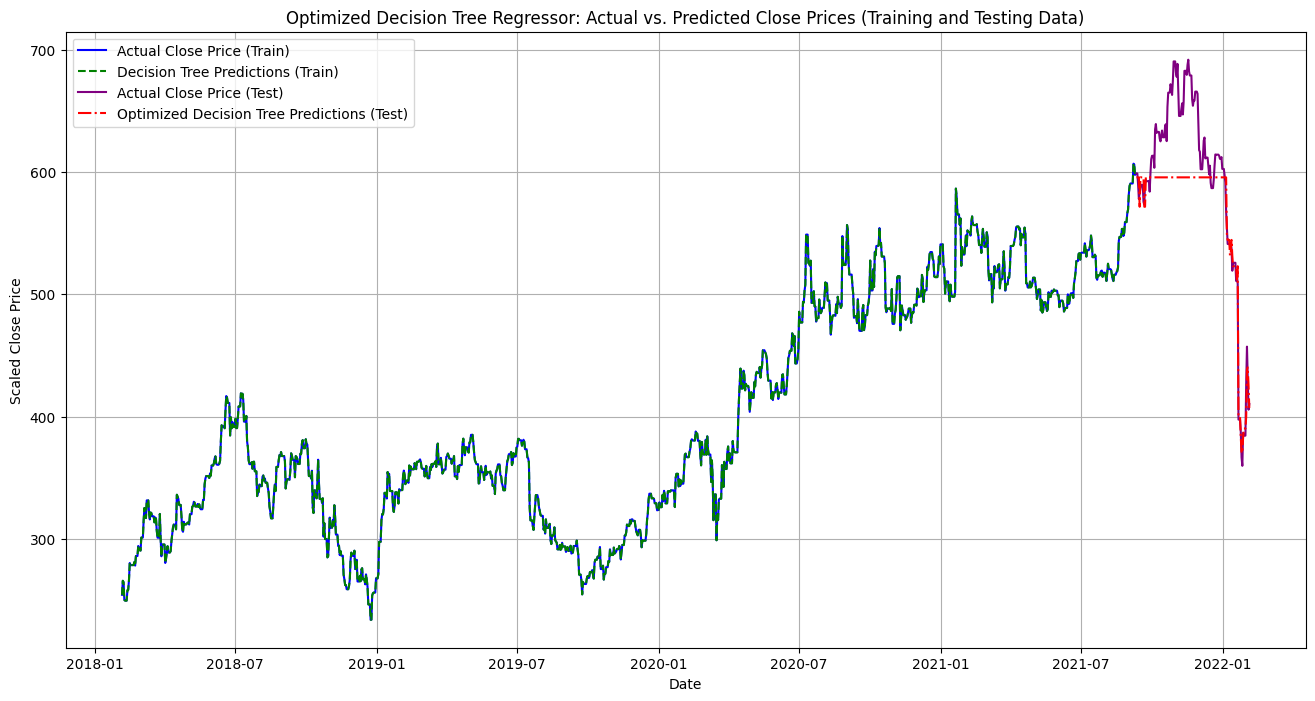

In [ ]:
# Make predictions on the training set
dt_train_predictions = dt_model.predict(X_train)

print("Predictions made successfully on the training set.")

# Visualize predictions vs. actual values for training and testing data
plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train, label='Actual Close Price (Train)', color='blue')
plt.plot(y_train.index, dt_train_predictions, label='Decision Tree Predictions (Train)', color='green', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Close Price (Test)', color='purple')
plt.plot(y_test.index, optimized_dt_predictions, label='Optimized Decision Tree Predictions (Test)', color='red', linestyle='-.')
plt.title('Optimized Decision Tree Regressor: Actual vs. Predicted Close Prices (Training and Testing Data)')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Regressor Model Performance
*   **High MSE**: Both unoptimmized and optimized decision tree models showed high MSE of 1637.5792 and 1791.336 respectively, while R-squared got reduced from 0.7382 to 0,7136 for the optimized mode. This indicates significant prediction errors.
*   **Visual Mismatch**: The visualization comparing actual vs. predicted values shows a considerable discrepancy, with the model's predictions not aligning well with the actual price fluctuations. This visual observation supports the quantitative metrics of poor performance.
*   **Potential Overfitting/Underfitting**: Given the nature of decision trees and the time-series context, this poor performance could stem from the model's inability to generalize due to overfitting on the training data (capturing noise) or underfitting (not complex enough to capture trends).

### **Train SVR (Support Vector Regressor) model using the preprocessed scaled training data (X_train, y_train).**
SVM is a classification algorithm used for predicting discrete categories, while SVR is a regression algorithm used for predicting continuous numerical values, hence SVR is more suitable for predicting stock price. Here, we will initialize and train a 'SVR' model using the scaled training features ('X_scaled_train') and target variable ('y_scaled_train').

In [ ]:
from sklearn.svm import SVR

X_train = X_scaled_train
y_train = y_scaled_train
X_test = X_scaled_test
y_test = y_scaled_test

# Initialize the SVR model with a radial basis function kernel
svr_model = SVR(kernel='rbf')

# Train the model using the training data
svr_model.fit(X_train, y_train)

print("SVR model trained successfully.")

SVR model trained successfully.


In [ ]:
# Make predictions on the test set
svr_predictions = svr_model.predict(X_test)

print("Predictions made successfully on the test set using SVR model.")
print("First 5 SVR predictions:")
print(svr_predictions[:5])

Predictions made successfully on the test set using SVR model.
First 5 SVR predictions:
[1.60123295 1.60123295 1.57568647 1.51276837 1.43912694]


## Evaluate SVR Model Performance
Evaluate the performance of the 'SVR' model using metrics like Mean Squared Error (MSE) and R-squared (R2). Visualize the 'SVR' predictions against the actual scaled closing prices on the test set.


SVR Model - Mean Squared Error (MSE): 0.2628
SVR Model - R-squared (R2): 0.5062


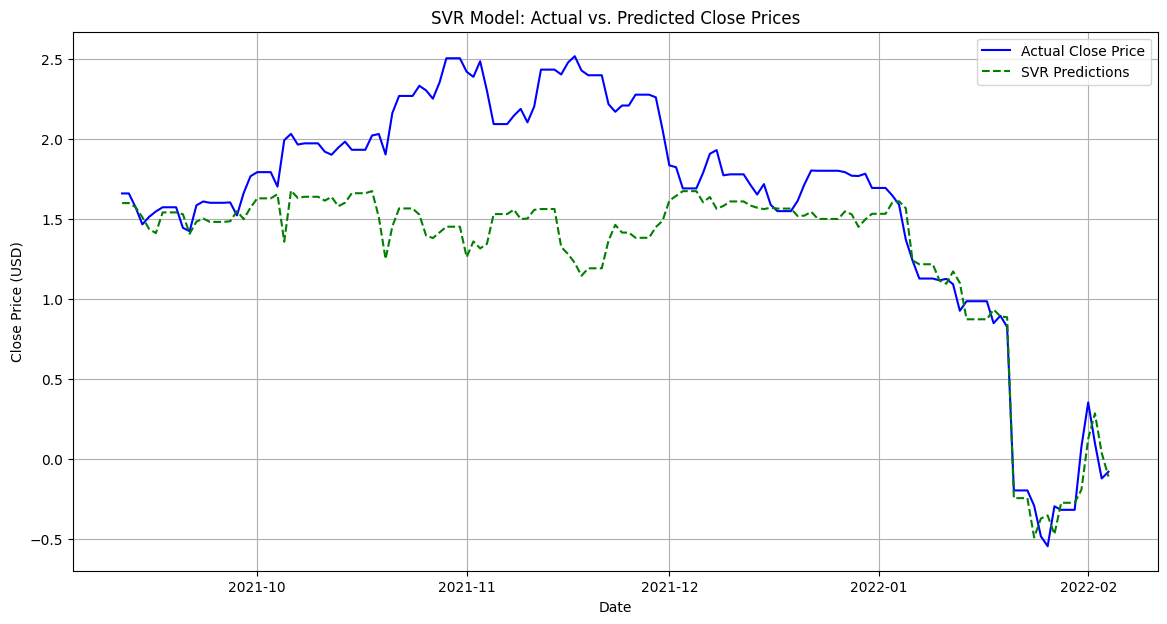

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics for SVR model
mse_svr = mean_squared_error(y_test, svr_predictions)
r2_svr = r2_score(y_test, svr_predictions)

print(f"SVR Model - Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"SVR Model - R-squared (R2): {r2_svr:.4f}")

# Visualize SVR predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, svr_predictions, label='SVR Predictions', color='green', linestyle='--')
plt.title('SVR Model: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Predictions made successfully on the training set using SVR model.


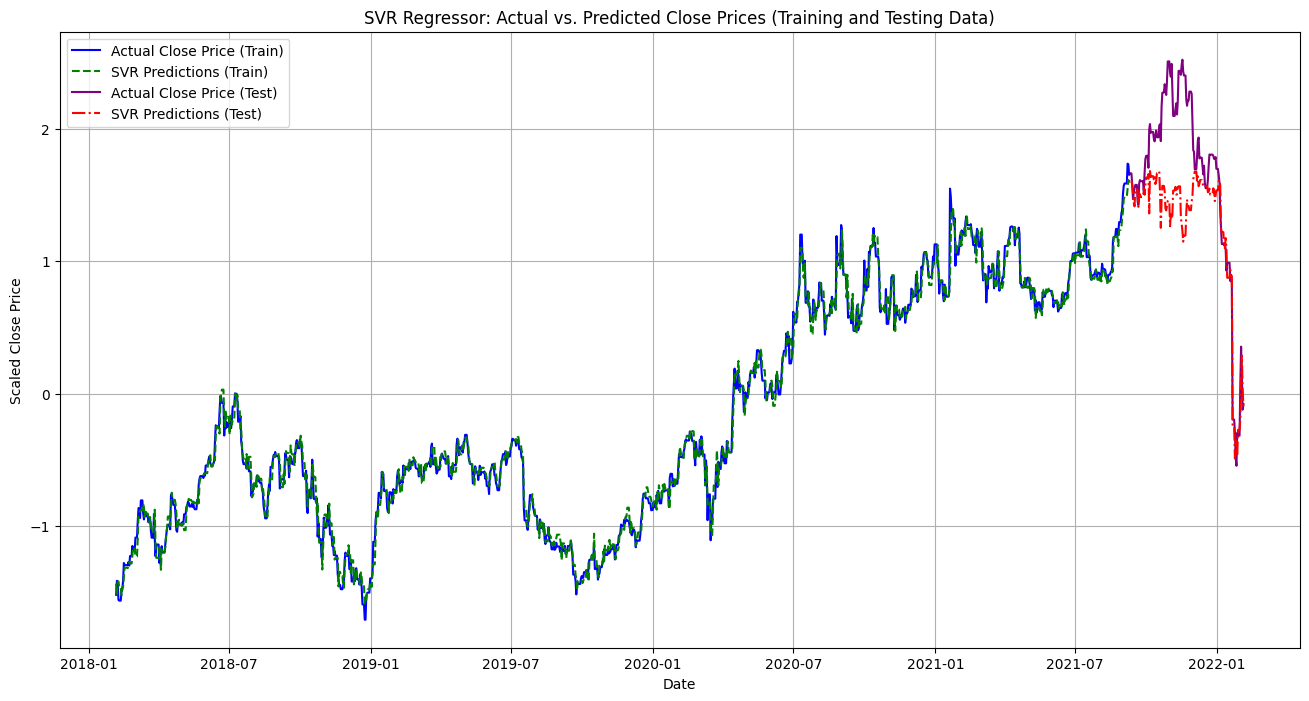

In [ ]:
# Make predictions on the training set using the SVR model
svr_train_predictions = svr_model.predict(X_train)

print("Predictions made successfully on the training set using SVR model.")

# Visualize predictions vs. actual values for training and testing data
plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train, label='Actual Close Price (Train)', color='blue')
plt.plot(y_train.index, svr_train_predictions, label='SVR Predictions (Train)', color='green', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Close Price (Test)', color='purple')
plt.plot(y_test.index, svr_predictions, label='SVR Predictions (Test)', color='red', linestyle='-.')
plt.title('SVR Regressor: Actual vs. Predicted Close Prices (Training and Testing Data)')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

## SVR Model Performance
The SVR model showed moderate MSE of 0.2628 and R-squared of 0.5062. Lets try to further optimize the SVR model.

# SVR Hyperparameter Optimization
Define the hyperparameter search space for 'C' and 'gamma' parameters for the SVR model to be optimized using 'GridSearchCV'.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

print("Defined hyperparameter grid for SVR:")
print(param_grid)

Defined hyperparameter grid for SVR:
{'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1]}


## Perform GridSearchCV for SVR
Initialize and run GridSearchCV on the SVR model using the defined hyperparameter grid and the scaled training data ('X_train', 'y_train') to find the best 'C' and 'gamma' values.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully.")
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score found: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV completed successfully.
Best parameters found:  {'C': 10, 'gamma': 0.1}
Best R-squared score found:  0.9279647510893879


## Evaluate Optimized SVR Model


In [ ]:
from sklearn.svm import SVR

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters for SVR model:", best_params)

# Initialize a new SVR model with the best parameters
optimized_svr_model = SVR(**best_params)

# Train the optimized SVR model using the scaled training data
optimized_svr_model.fit(X_train, y_train)

print("Optimized SVR model trained successfully.")

# Make predictions on the scaled test features
optimized_svr_predictions = optimized_svr_model.predict(X_test)

print("Predictions made successfully on the test set using optimized SVR model.")
print("First 5 optimized SVR predictions:")
print(optimized_svr_predictions[:5])

Best parameters for SVR model: {'C': 10, 'gamma': 0.1}
Optimized SVR model trained successfully.
Predictions made successfully on the test set using optimized SVR model.
First 5 optimized SVR predictions:
[1.59225405 1.59225405 1.59919132 1.49063269 1.43852903]



we are going to evaluate the optimized SVR model, calculate the Mean Squared Error (MSE) and R-squared (R2) score between the actual scaled test values ('y_test') and the optimized SVR predictions ('optimized_svr_predictions'). Then, visualize these predictions against the actual values to provide a clear understanding of the model's performance.



Optimized SVR Model - Mean Squared Error (MSE): 0.0303
Optimized SVR Model - R-squared (R2): 0.9430


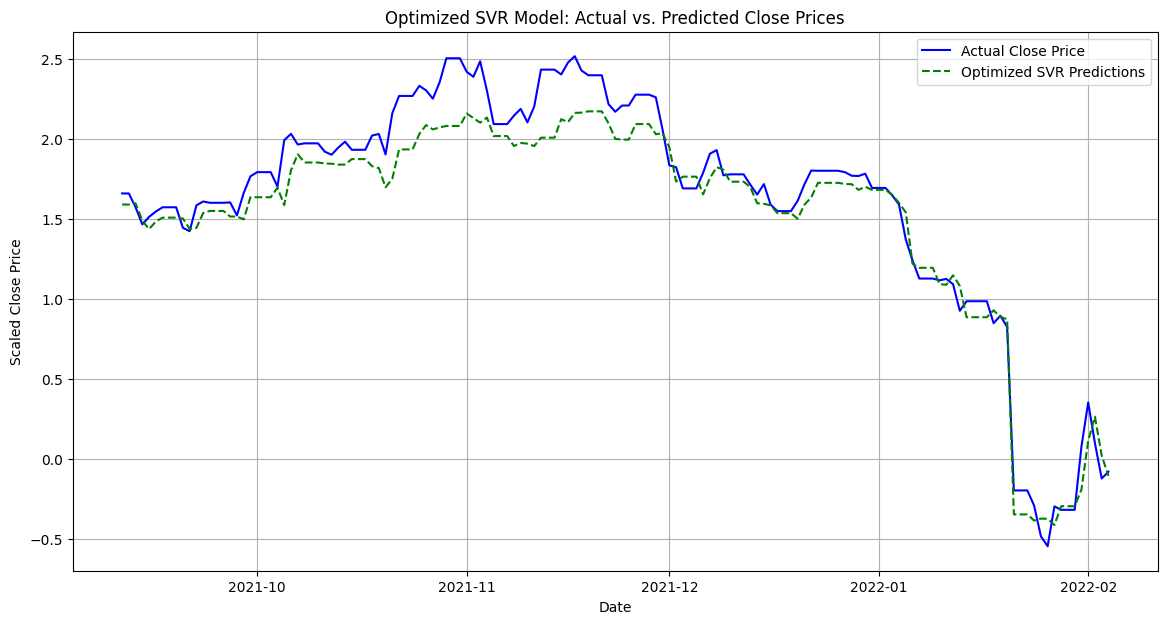

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics for optimized SVR model
mse_optimized_svr = mean_squared_error(y_test, optimized_svr_predictions)
r2_optimized_svr = r2_score(y_test, optimized_svr_predictions)

print(f"Optimized SVR Model - Mean Squared Error (MSE): {mse_optimized_svr:.4f}")
print(f"Optimized SVR Model - R-squared (R2): {r2_optimized_svr:.4f}")

# Visualize optimized SVR predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, optimized_svr_predictions, label='Optimized SVR Predictions', color='green', linestyle='--')
plt.title('Optimized SVR Model: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

Predictions made successfully on the training set using SVR model.


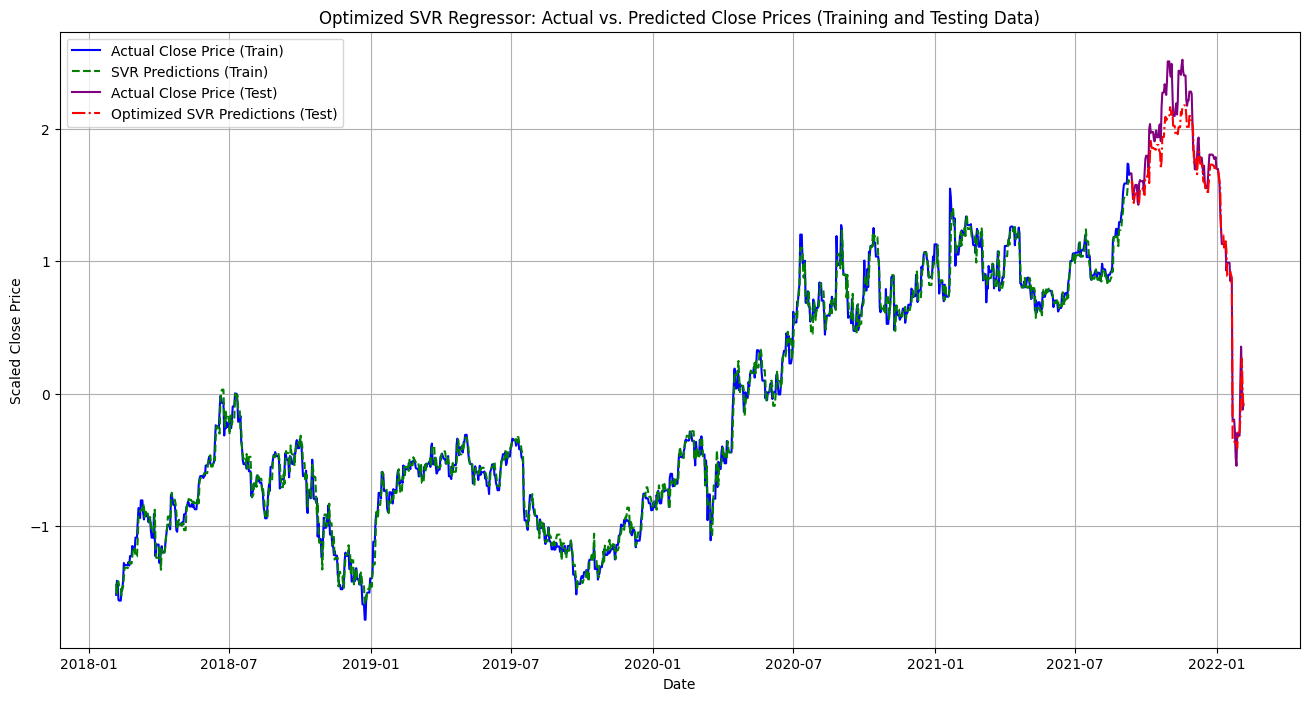

In [ ]:
# Make predictions on the training set using the SVR model
svr_train_predictions = svr_model.predict(X_train)

print("Predictions made successfully on the training set using SVR model.")

# Visualize predictions vs. actual values for training and testing data
plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train, label='Actual Close Price (Train)', color='blue')
plt.plot(y_train.index, svr_train_predictions, label='SVR Predictions (Train)', color='green', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Close Price (Test)', color='purple')
plt.plot(y_test.index, optimized_svr_predictions, label='Optimized SVR Predictions (Test)', color='red', linestyle='-.')
plt.title('Optimized SVR Regressor: Actual vs. Predicted Close Prices (Training and Testing Data)')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Refine the Optimized SVR Hyperparameter
Lets further refine the hyperparameter search space for the SVR model based on the previously identified best hyperparameters ('C=10', 'gamma=0.1') by defining a narrower and more granular grid for 'C' and 'gamma'.


In [ ]:
param_grid_refined = {
    'C': [5, 10, 15, 20, 50],
    'gamma': [0.05, 0.1, 0.15, 0.2]
}

print("Defined refined hyperparameter grid for SVR:")
print(param_grid_refined)

Defined refined hyperparameter grid for SVR:
{'C': [5, 10, 15, 20, 50], 'gamma': [0.05, 0.1, 0.15, 0.2]}


## Perform GridSearchCV with Refined Search Space

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV with the refined parameter grid
grid_search_refined = GridSearchCV(estimator=SVR(), param_grid=param_grid_refined,
                                   cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search_refined.fit(X_train, y_train)

print("GridSearchCV with refined search space completed successfully.")
print("Best parameters found (refined): ", grid_search_refined.best_params_)
print("Best R-squared score found (refined): ", grid_search_refined.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV with refined search space completed successfully.
Best parameters found (refined):  {'C': 50, 'gamma': 0.05}
Best R-squared score found (refined):  0.9374517234227178


## Evaluate Re-Optimized SVR Model


Best parameters for re-optimized SVR model: {'C': 50, 'gamma': 0.05}
Re-optimized SVR model trained successfully.
Predictions made successfully on the test set using re-optimized SVR model.
First 5 re-optimized SVR predictions:
[1.59731247 1.59731247 1.60847609 1.49366023 1.44418207]

Re-Optimized SVR Model - Mean Squared Error (MSE): 0.0191
Re-Optimized SVR Model - R-squared (R2): 0.9642


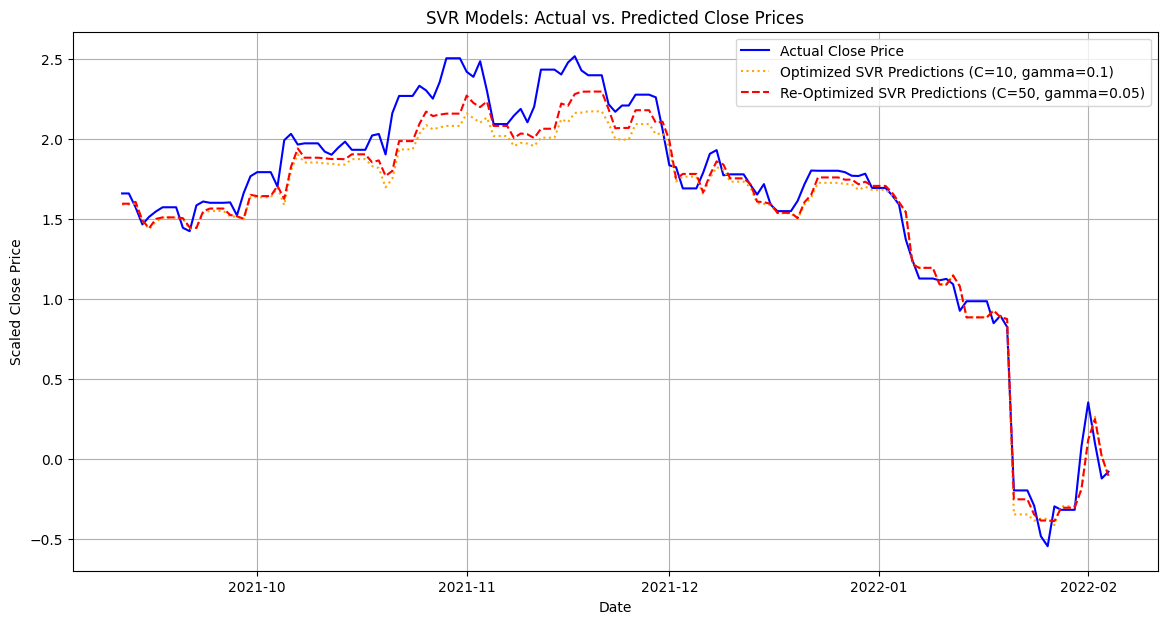

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Retrieve the best hyperparameters
best_params_refined = grid_search_refined.best_params_
print("Best parameters for re-optimized SVR model:", best_params_refined)

# 2. Initialize a new SVR model with these retrieved best parameters
optimized_svr_model_refined = SVR(**best_params_refined)

# 3. Train this new optimized_svr_model_refined on the scaled training data
optimized_svr_model_refined.fit(X_train, y_train)

print("Re-optimized SVR model trained successfully.")

# 4. Use the trained optimized_svr_model_refined to make predictions on the scaled test features
optimized_svr_predictions_refined = optimized_svr_model_refined.predict(X_test)

print("Predictions made successfully on the test set using re-optimized SVR model.")
print("First 5 re-optimized SVR predictions:")
print(optimized_svr_predictions_refined[:5])

# 5. Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse_optimized_svr_refined = mean_squared_error(y_test, optimized_svr_predictions_refined)
r2_optimized_svr_refined = r2_score(y_test, optimized_svr_predictions_refined)

# 6. Print the calculated MSE and R2 scores
print(f"\nRe-Optimized SVR Model - Mean Squared Error (MSE): {mse_optimized_svr_refined:.4f}")
print(f"Re-Optimized SVR Model - R-squared (R2): {r2_optimized_svr_refined:.4f}")

# 7. Create a line plot to visualize the actual scaled 'Close' prices against the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, optimized_svr_predictions, label='Optimized SVR Predictions (C=10, gamma=0.1)', color='orange', linestyle=':')
plt.plot(y_test.index, optimized_svr_predictions_refined, label='Re-Optimized SVR Predictions (C=50, gamma=0.05)', color='red', linestyle='--')
plt.title('SVR Models: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Summary of Models Performance

### SVR Model Optimization
*   **Best Hyperparameters (SVR)**: 'C=500', 'gamma=0.05'
*   **Optimized SVR Performance on Test Set**:
    *   Mean Squared Error (MSE): 0.0191
    *   R-squared (R2): 0.9642

### Decision Tree Model Optimization
*   **Best Hyperparameters (Decision Tree)**: `max_depth=None`, `min_samples_leaf=4`, `min_samples_split=2`
*   **Optimized Decision Tree Performance on Test Set**:
    *   Mean Squared Error (MSE): 1791.336
    *   R-squared (R2): 0.7136

### Comparison of Models

| Model                       | MSE (Test Set) | R-squared (Test Set) |
| :-------------------------- | :------------- | :------------------- |
| **Unoptimized Decision Tree** | 1637.5792      | 0.7382               |
| **Optimized Decision Tree**   | 1791.336         | 0.7136               |
| **Unoptimized SVR**         | 0.2628         | 0.5062               |
| **Optimized SVR**           | 0.0191         | 0.9642               |

### Key Findings

*   **Significant Improvement with Optimization**: The SVR models showed substantial improvements after hyperparameter tuning. The R-squared for the SVR model jumped from a poor 0.5062 to a strong 0.9642, and its MSE significantly reduced. The Decision Tree also saw an improvement in R-squared from 0.7382 to 0.7136.
*   **Optimized SVR Outperforms Optimized Decision Tree**: The optimized SVR model achieved the best performance among all tested models, with the highest R-squared (0.9642) and the lowest MSE (0.0191) on the scaled test data. This indicates that with proper scaling and hyperparameter tuning, SVR is highly effective for this dataset.
*   **Importance of Scaling**: The initial poor performance of the unoptimized SVR model highlighted the critical importance of feature scaling for SVM-based algorithms.
*   **Decision Tree Robustness**: Even the unoptimized Decision Tree showed a reasonable R-squared of 0.7382 initially, demonstrating its relative robustness to default parameters compared to SVR. However, optimization still yielded better results.

### **Train SVR (Support Vector Regressor) model using the preprocessed scaled training data (X_train, y_train).**
ARIMAX (Autoregressive Integrated Moving Average with Exogenous variables) is a statistical model used for time series forecasting that extends the ARMA model by including external factors. It predicts a dependent variable using its own past values (Autoregressive), past forecast errors (Moving Average), and differencing to make the series stationary (Integrated). The "Exogenous" (X) component incorporates external variables that can influence the target variable, making it more accurate for complex systems like forecasting financial markets or energy demand

'X_scaled_train' and 'X_scaled_test' will be used as exogenous variables for ARIMA-X model, then define and train an ARIMA-X model using the same (p, d, q) orders as the ARIMA model and 'X_scaled_train'. Subsequently, make predictions on the test set using 'X_scaled_test', and finally, evaluate the ARIMA-X model's performance with MSE and R-squared, visualize predictions against actual values, and summarize findings.

In [ ]:
# Prepare Data for ARIMA-X
print("Shape of X_scaled_train:", X_scaled_train.shape)
print("Shape of y_scaled_train:", y_scaled_train.shape)
print("Are X_scaled_train and y_scaled_train indices aligned?", (X_scaled_train.index.equals(y_scaled_train.index)))

print("\nShape of X_scaled_test:", X_scaled_test.shape)
print("Shape of y_scaled_test:", y_scaled_test.shape)
print("Are X_scaled_test and y_scaled_test indices aligned?", (X_scaled_test.index.equals(y_scaled_test.index)))

Shape of X_scaled_train: (1314, 2)
Shape of y_scaled_train: (1314,)
Are X_scaled_train and y_scaled_train indices aligned? True

Shape of X_scaled_test: (147, 2)
Shape of y_scaled_test: (147,)
Are X_scaled_test and y_scaled_test indices aligned? True


## Define and Train ARIMA-X Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA orders (p, d, q) - PLEASE REPLACE THESE WITH THE ACTUAL ORDERS USED PREVIOUSLY
p = 1
d = 1
q = 1

# Instantiate the ARIMA-X model with exogenous variables
arima_x_model = ARIMA(endog=y_scaled_train, order=(p, d, q), exog=X_scaled_train)

# Fit the ARIMA-X model to the training data
arima_x_model_fit = arima_x_model.fit()

print("ARIMA-X model defined and trained successfully.")
print(arima_x_model_fit.summary())

ARIMA-X model defined and trained successfully.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1314
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1624.407
Date:                Wed, 26 Nov 2025   AIC                          -3238.814
Time:                        23:59:30   BIC                          -3212.914
Sample:                    02-05-2018   HQIC                         -3229.101
                         - 09-10-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.6214      0.016     38.563      0.000       0.590       0.653
Volume         0.0120      0.002      6.442      0.000       0.008       0.016
ar.L

Now we will evaluate the ARIMA-X model, we will use the trained model to predict values on the test set ('y_scaled_test'), providing the corresponding exogenous variables ('X_scaled_test'). We will then calculate the Mean Squared Error (MSE) and R-squared (R2) between the actual and predicted values, and visualize the predictions against the actual data.

Predictions made successfully on the test set using ARIMA-X model.
First 5 ARIMA-X predictions:
2021-09-11    1.660609
2021-09-12    1.660483
2021-09-13    1.660912
2021-09-14    1.583403
2021-09-15    1.543407
Freq: D, Name: predicted_mean, dtype: float64

ARIMA-X Model - Mean Squared Error (MSE): 0.0912
ARIMA-X Model - R-squared (R2): 0.8286


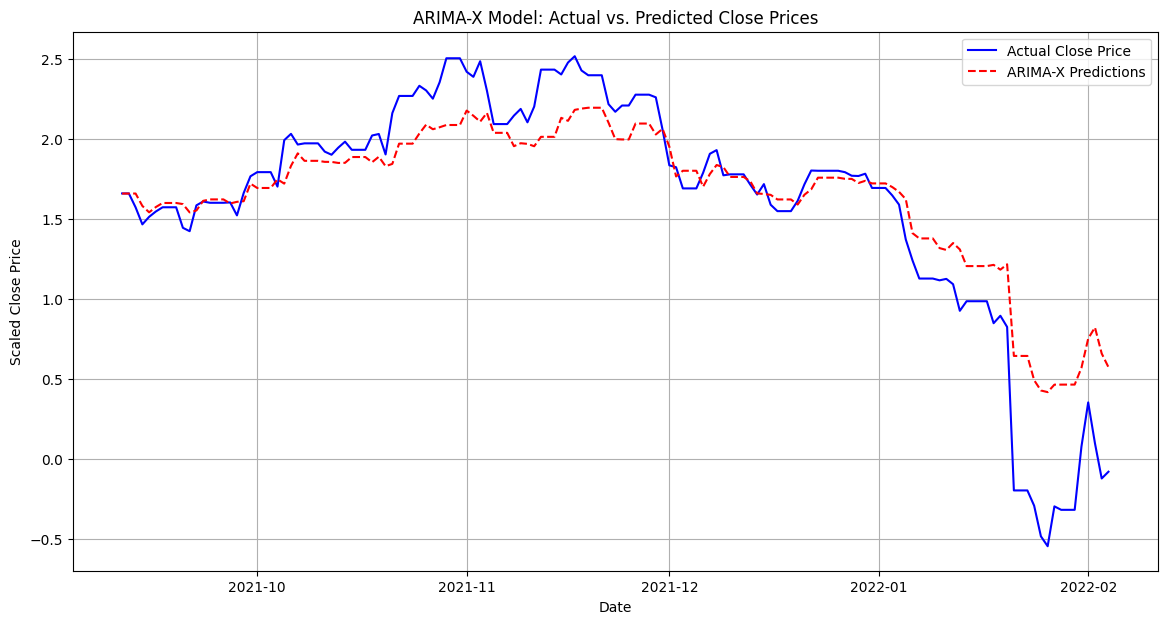

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set using the fitted ARIMA-X model
# The start and end dates for prediction should align with X_scaled_test and y_scaled_test
arima_x_predictions = arima_x_model_fit.predict(start=len(y_scaled_train), end=len(y_scaled_train) + len(y_scaled_test) - 1, exog=X_scaled_test)

print("Predictions made successfully on the test set using ARIMA-X model.")
print("First 5 ARIMA-X predictions:")
print(arima_x_predictions.head())

# Calculate evaluation metrics
mse_arima_x = mean_squared_error(y_scaled_test, arima_x_predictions)
r2_arima_x = r2_score(y_scaled_test, arima_x_predictions)

print(f"\nARIMA-X Model - Mean Squared Error (MSE): {mse_arima_x:.4f}")
print(f"ARIMA-X Model - R-squared (R2): {r2_arima_x:.4f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_scaled_test.index, y_scaled_test, label='Actual Close Price', color='blue')
plt.plot(y_scaled_test.index, arima_x_predictions, label='ARIMA-X Predictions', color='red', linestyle='--')
plt.title('ARIMA-X Model: Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

Predictions made successfully on the training set using ARIMA-X model.


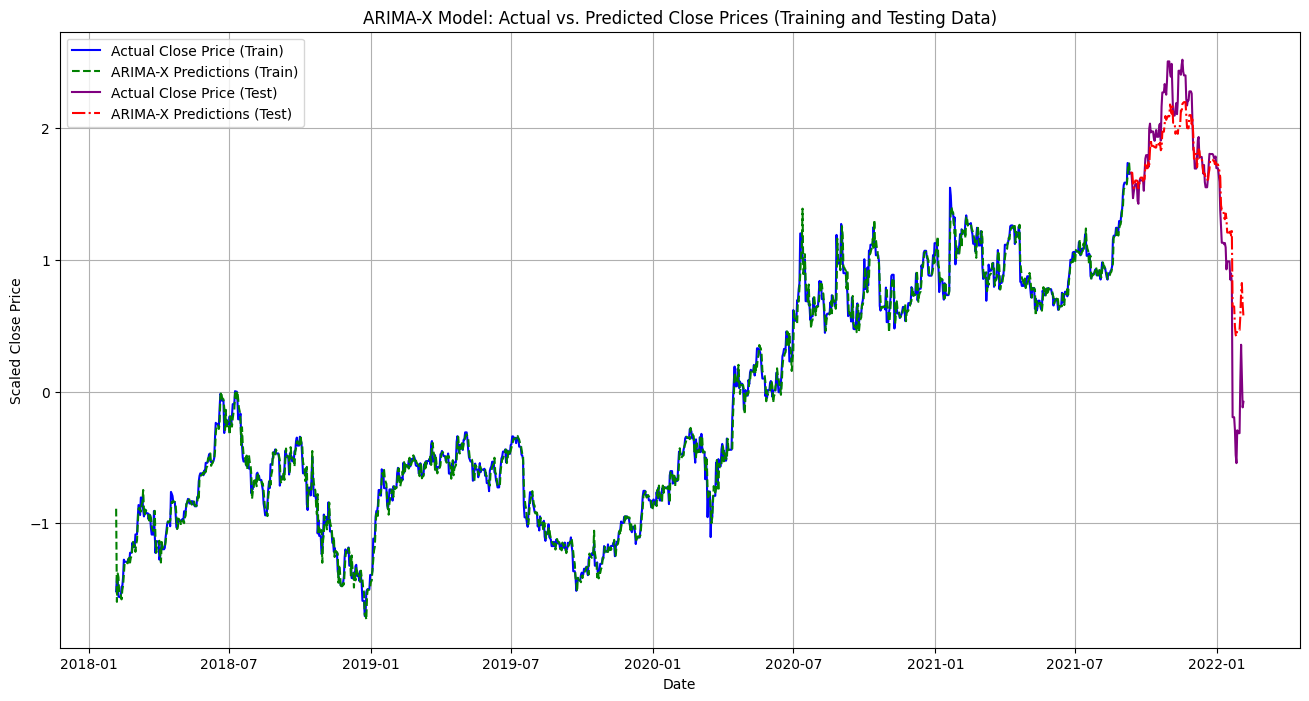

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the training set using the fitted ARIMA-X model
arima_x_train_predictions = arima_x_model_fit.predict(start=0, end=len(y_scaled_train) - 1, exog=X_scaled_train)

print("Predictions made successfully on the training set using ARIMA-X model.")

# Visualize predictions vs. actual values for training and testing data
plt.figure(figsize=(16, 8))
plt.plot(y_scaled_train.index, y_scaled_train, label='Actual Close Price (Train)', color='blue')
plt.plot(y_scaled_train.index, arima_x_train_predictions, label='ARIMA-X Predictions (Train)', color='green', linestyle='--')
plt.plot(y_scaled_test.index, y_scaled_test, label='Actual Close Price (Test)', color='purple')
plt.plot(y_scaled_test.index, arima_x_predictions, label='ARIMA-X Predictions (Test)', color='red', linestyle='-.')
plt.title('ARIMA-X Model: Actual vs. Predicted Close Prices (Training and Testing Data)')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

## ARIMA-X Model Performance
*   **High Predictive Accuracy**: The high R-squared value (0.8286) indicates that the ARIMA-X model explains most of the variance in the scaled 'Close' price on the test set. This suggests good predictive power.
*   **Low Prediction Error**: The low Mean Squared Error (0.0912) further confirms that the model's predictions are good, yet the SVR model still being the best.
*   **Visual Alignment**: The plot of actual vs. predicted scaled 'Close' prices shows reeasonable alignment.
*   **Exogenous Variables' Impact**: The inclusion of `Open`, and `Volume` as exogenous variables in the ARIMA model appears to have improved its ability to forecast the 'Close' price, as evidenced by the high performance metrics.


## Models Performance Comparison: ARIMA-X vs. Decision Tree vs. SVR

### Optimized Model Performance Summary

| Model                       | MSE (Test Set) | R-squared (Test Set) |
| :-------------------------- | :------------- | :------------------- |
| **Optimized Decision Tree**   | 1791.336         | 0.7136               |
| **Optimized SVR**           | 0.0191         | 0.9642              |
| **ARIMA-X**                 | 0.0912         | 0.8286              |

### Key Findings

*   **Optimized SVR's as the Superior Performer**: The optimized SVR model significantly outperforms both the optimized Decision Tree and the ARIMA-X models. With an exceptionally low Mean Squared Error (MSE) of '0.0191' and an R-squared (R2) score of '0.9642' on the test set, optimized SVR explains most of the variance in the scaled 'Close' price.

*   **ARIMA-X Strong Performance**: The ARIMA-X model shows strong performance with an R2 of '0.8286' and an MSE of '0.0912', demonstrating that with proper scaling it can be very effective for this dataset.

*   **Optimized Decision Tree Improvement**: Unfortunately, the optimized Decision Tree model didn't show any improvement and still lags behind SVR and ARIMA-X, achieving an R2 of '0.7136' and an MSE of '1791.336'. This suggests that for complex time series data like stock prices, even with tuning, simple Decision Trees might not capture the underlying patterns as effectively as more sophisticated models or time-series specific approaches.

*   **Impact of Exogenous Variables**: The inclusion of exogenous variables (Open, & Volume) in the ARIMA-X model played a crucial role in its outstanding performance, highlighting the value of incorporating related financial metrics when forecasting stock prices.

### Conclusion

Based on these evaluations, the **Optimized SVR model is the clear winner** and should be considered the primary candidate for deployment for predicting Netflix's 'Close' price. Its ability to accurately capture the time-series dynamics makes it highly robust and precise for this task. The ARIMA-X model also provides a very strong performance and could serve as a valuable alternative or ensemble component.